In [7]:
data_dir = "/home/pez/phd/writing/writing_logs/dlis"

In [8]:
import matplotlib as mpl

mpl.rcParams["hatch.linewidth"] = 0.6  # previous pdf hatch linewidth
mpl.rcParams["hatch.linewidth"] = 6.0  # previous svg hatch linewidth

nice_fonts = {
    "text.usetex": False,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 60,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 60,
    "legend.title_fontsize": 60,
    "xtick.labelsize": 60,
    "ytick.labelsize": 60,
}

mpl.rcParams.update(nice_fonts)

import json
import os

import matplotlib.pyplot as plt
import pandas as pd

In [9]:
def load_data(data_dir: os.PathLike):
    data = pd.DataFrame()
    for file in os.listdir(data_dir):
        if file.endswith(".json"):
            file_path = os.path.join(data_dir, file)
            with open(file_path) as f:
                data = data.append(json.load(f), ignore_index=True)

    data.fillna(0, inplace=True)

    data["time"] = pd.to_datetime(data["time"])
    data["word_count"] = data["word_count"].astype(int)
    data["page_count"] = data["page_count"].astype(int)
    return data


df = load_data(data_dir)
df

/tmp/ipykernel_1835241/3920571779.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(json.load(f), ignore_index=True)
/tmp/ipykernel_1835241/3920571779.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(json.load(f), ignore_index=True)
/tmp/ipykernel_1835241/3920571779.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(json.load(f), ignore_index=True)
/tmp/ipykernel_1835241/3920571779.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(json.load(f), ignore_index=True)
/tmp/ipykernel_1835241/3920571779.py:7: FutureWarning: The frame.append method is deprecated

,time,word_count,page_count,references,figures,\includegraphics[
0,2023-02-04 17:40:53,3954,7,0.0,0.0,0.0
1,2023-02-04 18:05:07,4076,7,0.0,0.0,0.0
2,2023-03-03 13:00:20,5967,9,0.0,0.0,0.0
3,2023-03-09 19:00:12,7499,11,0.0,0.0,0.0
4,2023-03-09 13:00:13,6521,10,0.0,0.0,0.0
5,2023-03-10 14:55:02,7499,11,22.0,6.0,46.0
6,2023-03-09 18:00:13,7223,11,0.0,0.0,0.0
7,2023-03-06 16:00:13,6291,10,0.0,0.0,0.0
8,2023-02-04 19:00:17,4431,8,0.0,0.0,0.0
9,2023-02-12 20:00:29,6074,10,0.0,0.0,0.0


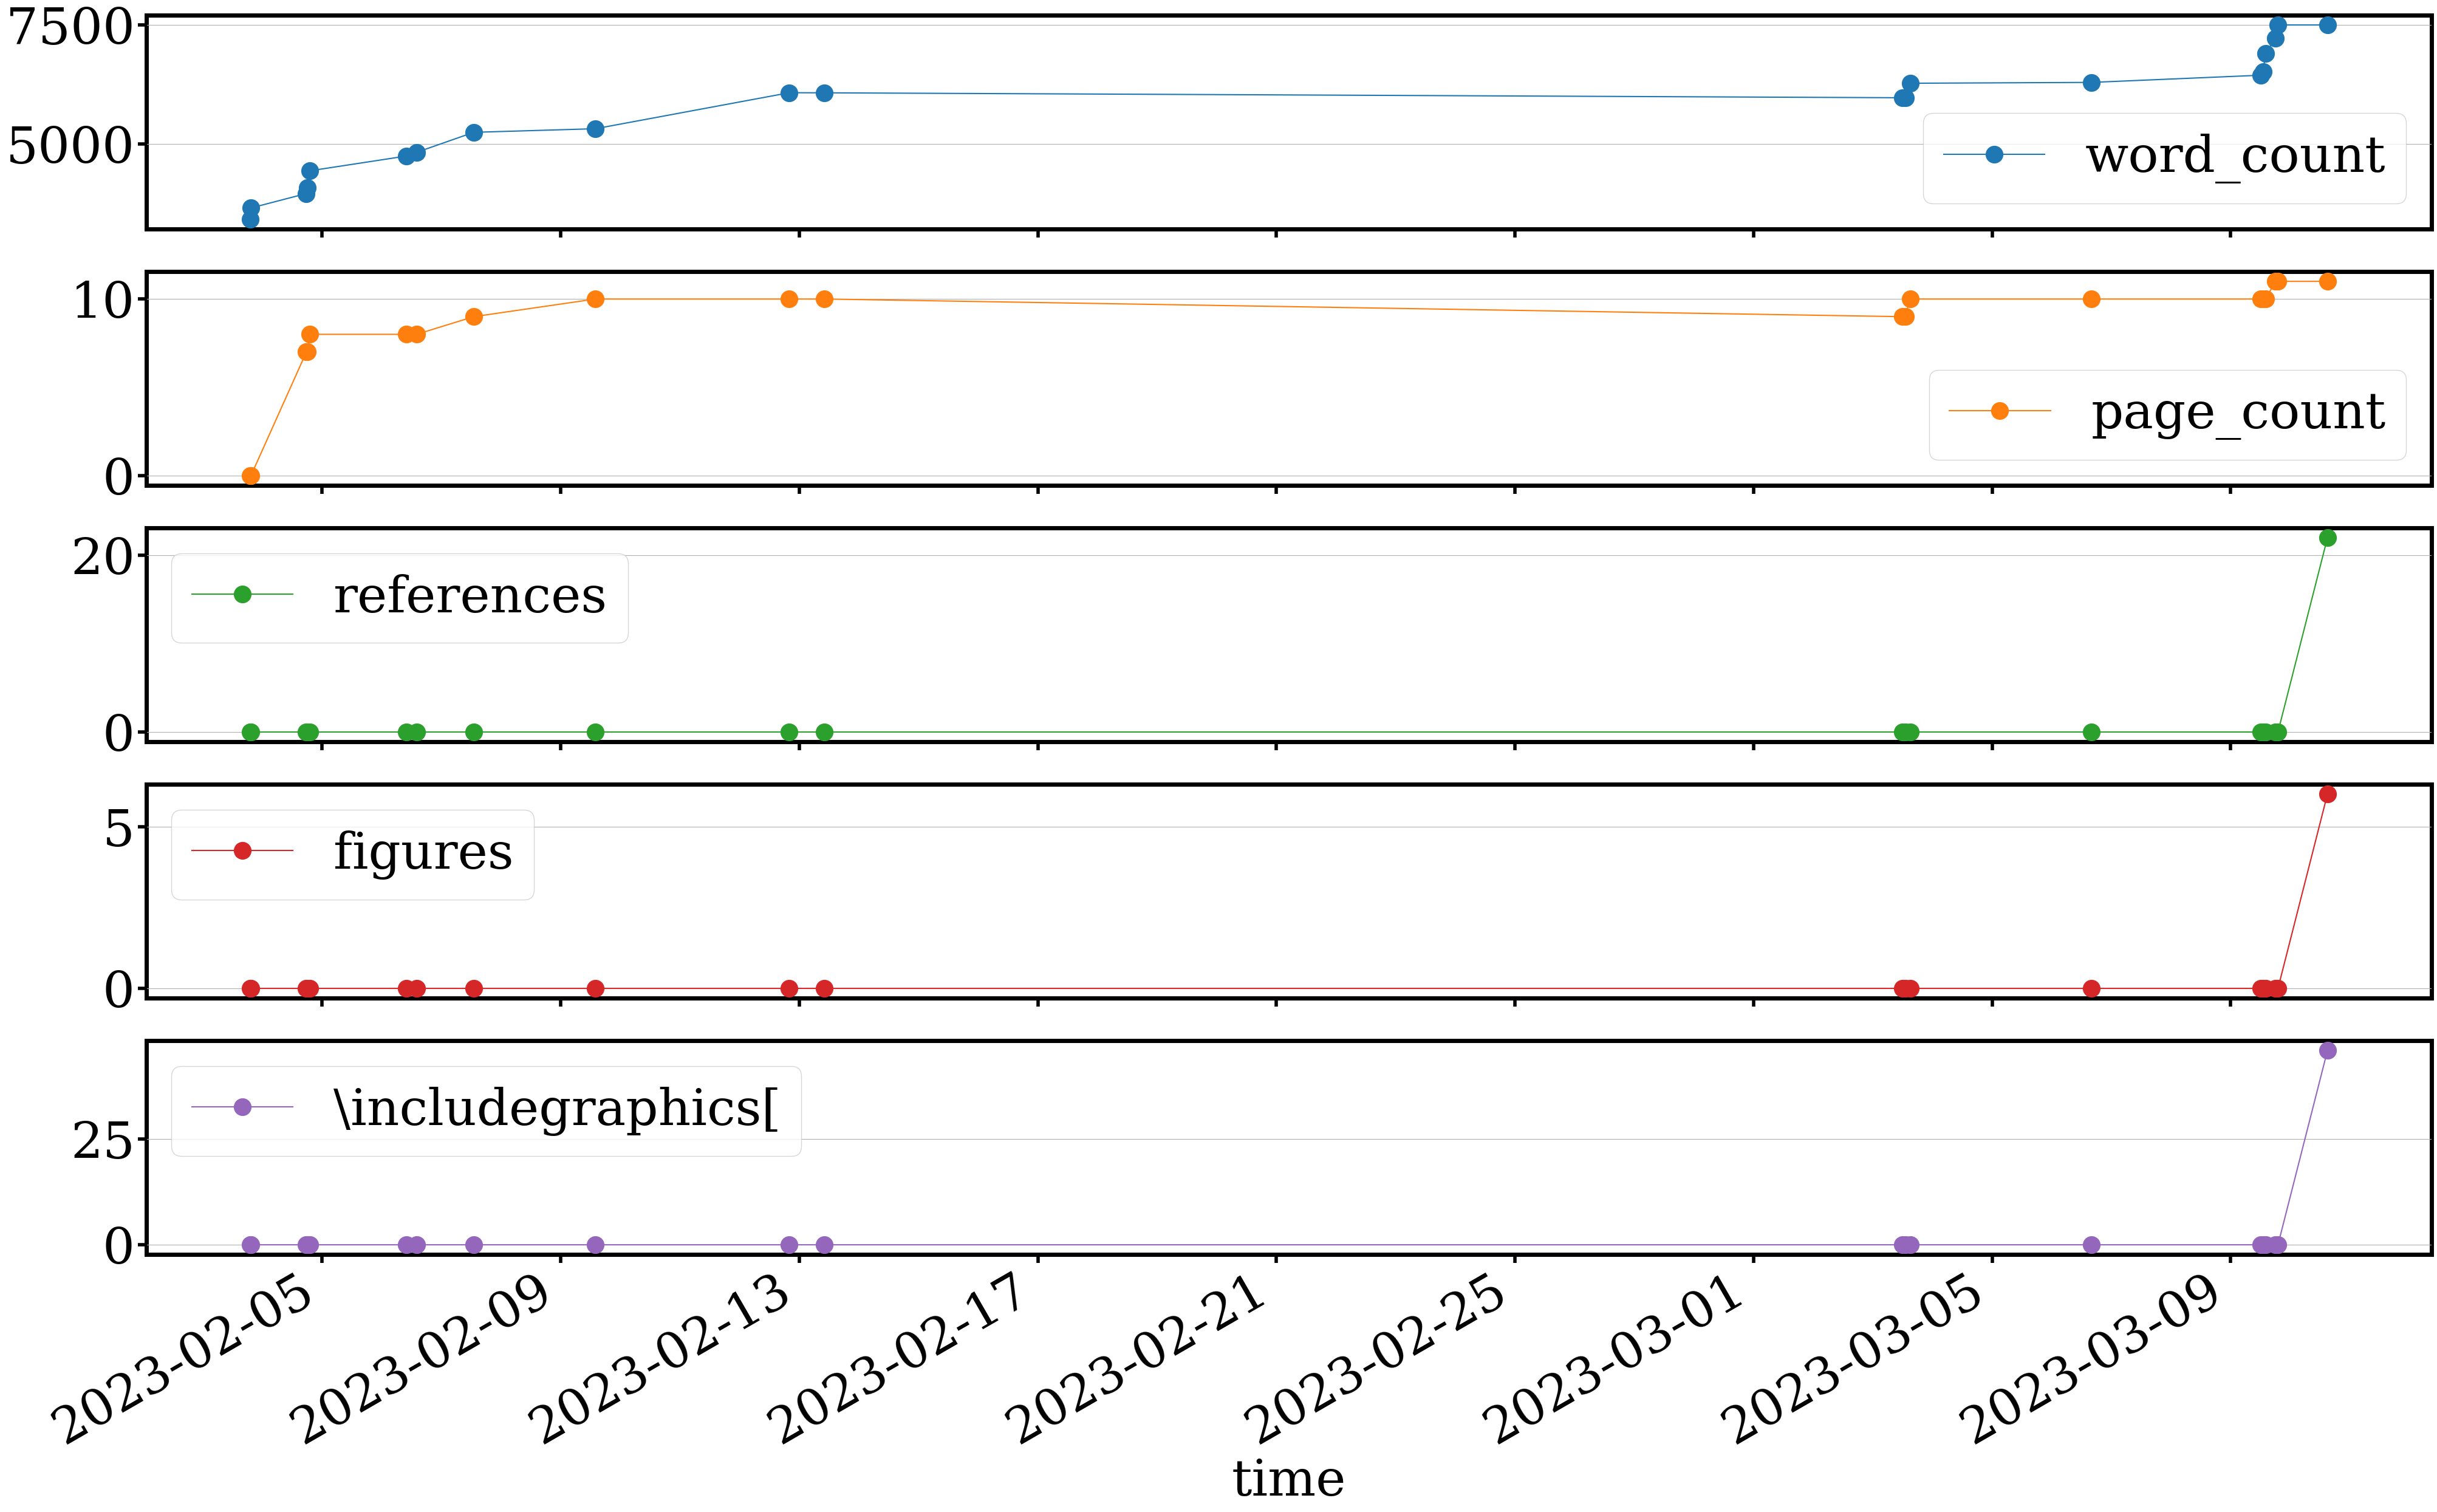

In [10]:
sc = 5 * df.shape[1]
# fig, ax = plt.subplots()


axs = df.plot.line(
    subplots=True, x="time", figsize=(sc * 1.61803, sc), marker="o", markersize=20
)

for ax in axs:
    ax.yaxis.grid()
    ax.patch.set_edgecolor("black")
    ax.patch.set_linewidth(5)

    # custom lines of points
    ax.xaxis.set_tick_params(width=4, length=10)
    ax.yaxis.set_tick_params(width=4, length=10)

In [ ]:
plt.show()